    valores de fi:  [229.3  290.05 351.2  403.25 437.9 ]
divisores en L(i):  [24. -6.  4. -6. 24.]

Polinomio de Lagrange, expresiones
9.55416666666667*(x - 5)*(x - 4)*(x - 3)*(x - 2) - 48.3416666666667*(x - 5)*(x - 4)*(x - 3)*(x - 1) + 87.8*(x - 5)*(x - 4)*(x - 2)*(x - 1) - 67.2083333333333*(x - 5)*(x - 3)*(x - 2)*(x - 1) + 18.2458333333333*(x - 4)*(x - 3)*(x - 2)*(x - 1)

Polinomio de Lagrange: 
0.0499999999999972*x**4 - 2.08333333333326*x**3 + 11.4499999999998*x**2 + 40.2333333333336*x + 179.65


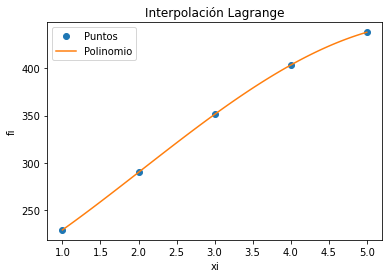

In [2]:
# Interpolacion de Lagrange
# divisoresL solo para mostrar valores
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO , Datos de prueba
xi= np.array([1, 2, 3, 4, 5])
fi= np.array([229.30, 290.05, 351.20, 403.25, 437.90])

# PROCEDIMIENTO
# Polinomio de Lagrange
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
polisimple = polinomio.expand()

# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
print('    valores de fi: ',fi)
print('divisores en L(i): ',divisorL)
print()
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print()
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
#plt.ylim(0,3)
plt.show()

In [1]:
from sympy import *
from sympy.plotting import plot
from sympy.abc import x
def maxminf(f):
    """ Calcula los máximos y mínimos de una función f(x) """
    df = diff(f, x) # 1era. derivada
    d2f = diff(f, x, 2) # 2da. derivada
    pcs = solve(Eq(df,0)) # puntos críticos
    pc=[]
    for i in range(len(pcs)):
        aux=complex(pcs[i])
        pc.append(aux.real)
    print(pc)
    for p in pc:
        if d2f.subs(x,p)>0: 
            tipo="Min"
        elif d2f.subs(x,p)<0: 
            tipo="Max"
        else: 
            tipo="Indefinido"
        print("x = %f (%s)"%(p,tipo))
maxminf(0.0499999999999972*x**4 - 2.08333333333326*x**3 + 11.4499999999998*x**2 + 40.2333333333336*x + 179.65)

[-1.2865592026210877, 5.861709007562537, 26.67485019505855]
x = -1.286559 (Min)
x = 5.861709 (Max)
x = 26.674850 (Min)


In [6]:
def f(x):return (0.0499999999999972*x**4 - 2.08333333333326*x**3 + 11.4499999999998*x**2 + 40.2333333333336*x + 179.65)
print("Valor máximo de la bolsa: ",f(5.861709))

Valor máximo de la bolsa:  448.3369198571262
